### explain why ML in image segmentation

In [2]:
import numpy as np
import cv2 as cv
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from skimage.filters.rank import entropy
from skimage.morphology import disk
import skimage.io as skio
#from sklearn.

### Load data

labeled_stack = np.array([])
for i in range(1,10):
    if i == 1:
        labeled_stack = skio.imread(f'Data/sandstone/train_mask/Sandstone_labeled_{i}.tif')
    else:
        tmp = skio.imread(f'Data/sandstone/train_mask/Sandstone_labeled_{i}.tif')
        labeled_stack = np.append(labeled_stack, tmp)
    #else:
    #    tmp = skio.imread(f'Data/sandstone/train_mask/Sandstone_labeled_{i}.tif')
    #    labeled_stack.append(tmp)
    

# use reshape to break up the pixels into images
test = labeled_stack.reshape(9, 1024, 996, 3)

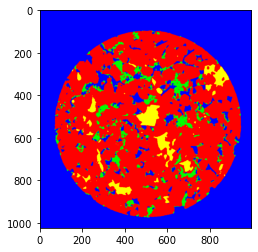

In [181]:
for picture in test:
    plt.imshow(picture)

In [192]:
np.nanmean(np.array([1, 2, 4, np.nan]))

2.3333333333333335

In [190]:
np.nanstd(np.array([1, 2, 4, np.nan]))

1.247219128924647

In [178]:
27537408/(1024*996)

27.0

In [172]:
img.shape

(1024, 996)

In [169]:
np.append(img, img).shape

(2039808,)

In [164]:
test = np.stack((img, img, img), axis=0).shape

In [167]:
np.concatenate((test, img), axis=0).shape

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

In [156]:
labeled_stack.shape

(2048, 996, 3)

In [83]:
labeled_stack = skio.imread('Data/sandstone/partial_labels_for_traditional_ML/sandstone_partial_labels_from_APEER_ML.tif')
original_stack = skio.imread('Data/sandstone/partial_labels_for_traditional_ML/sandstone_train_images.tif')

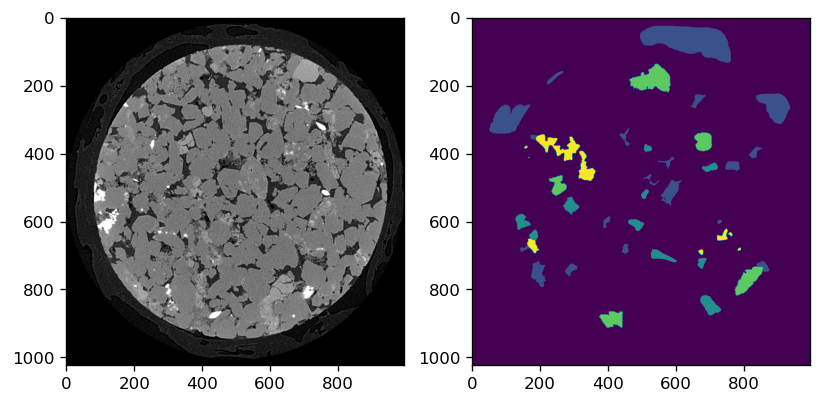

In [96]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(8, 4), dpi=120)
ax[0].imshow(original_stack[2], cmap='gray')
ax[1].imshow(labeled_stack[0], cmap='viridis')

In [101]:
test = np.stack((img, img))

In [102]:
test.shape

(2, 1024, 996)

In [104]:
test[0].shape

(1024, 996)

In [106]:
for image in test:
    print(image.shape)

(1024, 996)
(1024, 996)


In [3]:
img = cv.imread('Data/sandstone/Sandstone_Versa0000.tif')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [6]:
df = pd.DataFrame()

In [7]:
# add the pixel values to the dataframe as feature 1
df['px_value'] = img.reshape(-1)

### 2. feature engineering extraction


#### Entropy filter for texture detection
- `disk` Generates a flat, disk-shaped footprint.

In [5]:
test = disk(radius=2)

In [6]:
test

array([[0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [1]:
entropy = entropy(img, disk(1))

NameError: name 'entropy' is not defined

#### Gabor filter set

In [8]:
ksize = 5
phi = 0
theta = np.arange(2)
sigma = np.array([3,5])
wavelength = np.arange(0, np.pi, np.pi/4)
gamma = np.array([0.05, 0.5])

In [9]:
num = 1
for theta_ in theta:
    for sigma_ in sigma:
        for wavelength_ in wavelength:
            for gamma_ in gamma:
                gabor_label = f'Gabor {num}'
                kernel = cv.getGaborKernel((ksize, ksize), sigma_, theta_,
                                           wavelength_, gamma_, phi,
                                           ktype=cv.CV_32F)
                filtered_imag = cv.filter2D(img, cv.CV_8UC3, kernel)
                filtered_imag_transformed = filtered_imag.reshape(-1)
                df[gabor_label] = filtered_imag_transformed
                num += 1

In [11]:
df.head(2)

,px_value,Gabor 1,Gabor 2,Gabor 3,Gabor 4,Gabor 5,Gabor 6,Gabor 7,Gabor 8,Gabor 9,...,Gabor 23,Gabor 24,Gabor 25,Gabor 26,Gabor 27,Gabor 28,Gabor 29,Gabor 30,Gabor 31,Gabor 32
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Canny edge

In [13]:
edge_canny = cv.Canny(img, 100, 200)

In [17]:
df['Canny Edge'] = edge_canny.reshape(-1)

### 

In [18]:
from skimage.filters import roberts, sobel, scharr, prewitt

In [19]:
edge_roberts = roberts(img)
df['Roberts Edge'] = edge_roberts.reshape(-1)

In [20]:
edge_sobel = sobel(img)
df['Sobel Edge'] = edge_sobel.reshape(-1)

In [21]:
edge_scharr = scharr(img)
df['Scharr Edge'] = edge_scharr.reshape(-1)

In [22]:
edge_prewitt = prewitt(img)
df['Prewitt Edge'] = edge_prewitt.reshape(-1)

In [23]:
from scipy import ndimage as nd

In [24]:
for sigma_ in [3, 7]:
    feature_name = f'Gaussian s{sigma_}'
    gaussian = nd.gaussian_filter(img, sigma=sigma_)
    df[feature_name] = gaussian.reshape(-1)

In [25]:
median_img = nd.median_filter(img, size = 3)
df['Median Filter'] = median_img.reshape(-1)

In [26]:
variance_img = nd.generic_filter(img, np.var, size=3)
df['Variance s3'] = variance_img.reshape(-1)

In [27]:
df.head(1)

,px_value,Gabor 1,Gabor 2,Gabor 3,Gabor 4,Gabor 5,Gabor 6,Gabor 7,Gabor 8,Gabor 9,...,Gabor 32,Canny Edge,Roberts Edge,Sobel Edge,Scharr Edge,Prewitt Edge,Gaussian s3,Gaussian s7,Median Filter,Variance s3
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0,0,0,0


In [28]:
### Add the target labels
labeled_img = cv.imread('Data/sandstone/Sandstone_Versa0000_labeled.tif')

In [29]:
df['Label'] = cv.cvtColor(labeled_img, cv.COLOR_BGR2GRAY).reshape(-1)

In [31]:
df.Label.unique()

array([ 29,  76, 150, 226], dtype=uint8)

### Training Random Forest Model

#### prepare the train/test set

In [33]:
y = df['Label'].values

In [32]:
X = df.drop(['Label'], axis=1)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=20)

#### Model Training

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt

In [39]:
model = RandomForestClassifier(n_estimators=10, random_state=42)

In [40]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [42]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [47]:
print(f'Accuracy = {metrics.accuracy_score(y_test, y_pred_test)}')

Accuracy = 0.9813741126639038


In [48]:
print(f'Accuracy = {metrics.accuracy_score(y_train, y_pred_train)}')

Accuracy = 0.9987183653345136


In [50]:
#print(f'Accuracy = {metrics.precision_score(y_test, y_pred_test)}')

#### feature selection

### Retrain model with hyperparameter tuning

In [56]:
feature_imp = pd.Series(model.feature_importances_, index=model.feature_names_in_)

In [60]:
feature_imp.sort_values(ascending=False)

Gaussian s3      2.782021e-01
Median Filter    1.822115e-01
Gabor 8          1.506646e-01
px_value         1.232086e-01
Gabor 15         7.601041e-02
Prewitt Edge     5.808042e-02
Gabor 7          5.150891e-02
Gaussian s7      2.518512e-02
Gabor 16         1.126116e-02
Scharr Edge      1.075873e-02
Sobel Edge       7.515054e-03
Roberts Edge     6.674109e-03
Gabor 32         3.828281e-03
Variance s3      3.571853e-03
Gabor 23         3.421439e-03
Gabor 31         2.667845e-03
Gabor 24         2.096423e-03
Gabor 30         1.918625e-03
Canny Edge       1.160401e-03
Gabor 3          2.822853e-05
Gabor 4          1.278618e-05
Gabor 21         5.029212e-06
Gabor 6          3.242632e-06
Gabor 5          1.635708e-06
Gabor 11         1.080135e-06
Gabor 22         9.662823e-07
Gabor 13         3.821635e-07
Gabor 29         3.606970e-07
Gabor 19         3.441844e-07
Gabor 27         2.565394e-07
Gabor 28         3.749549e-08
Gabor 20         1.905760e-08
Gabor 12         5.221821e-09
Gabor 14  

In [ ]:
"""1. define modeling pipeline"""
steps = [('ft', Feature_Transformer()),
         ('rf', RandomForestRegressor())]
pipe_rf = Pipeline(steps)

In [ ]:
"""2. hyperparameters to be tuned"""
parameters = {'rf__max_features': ['sqrt'], #np.arange(1, 7), # The number of features to consider when looking for the best split: sqrt(n_features)
              'rf__n_estimators': np.arange(50, 401, 50), #number of trees to be average
              'rf__max_depth': [None], # let the trees grow freely in RandomForest
              'rf__min_samples_leaf': np.arange(1, 41, 2)*0.001, #fraction of samples
              'rf__bootstrap': [True], #conventional definition for bagging
              'rf__random_state': [0]}

In [ ]:
"""3. Define the scorers"""
scorer = make_scorer(mean_squared_error, greater_is_better = False)

In [ ]:
"""4. Define gridsearch process"""
gscv_rf = GridSearchCV(pipe_rf, 
                       parameters, 
                       cv = 5, 
                       scoring = scorer, 
                       n_jobs = -1)

In [ ]:
"""5. Run GSCV and search for optimal hypermeters"""
import time
start = time.time()
gscv_rf = gscv_rf.fit(train_raw, y_train)
end = time.time()
print('GSCV total time: {0:.2f} minutes'.format((end - start)/60))

In [ ]:
steps = (